In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.linalg import fractional_matrix_power
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

#### Self Loop가 없는 그래프 

LOG >>> Graph Info:
Name: My_G
Type: MultiGraph
Number of nodes: 4
Number of edges: 6
Average degree:   3.0000

LOG >>> Graph Nodes: [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3})]

LOG >>> Graph Edges: [(0, 1, {}), (0, 3, {}), (1, 2, {}), (1, 3, {}), (1, 3, {}), (2, 3, {})]



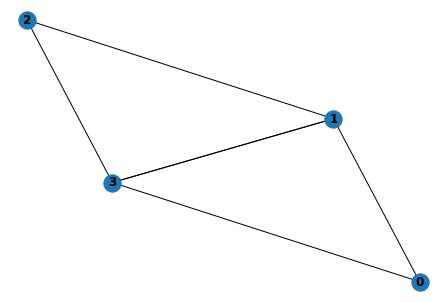

In [2]:
G = nx.MultiGraph(name='My_G')

for i in range(4):
    G.add_node(i, name=i)
    
edges = [(0, 1), (0, 3), (1, 2), (1, 3), (1, 3), (2, 3)]
G.add_edges_from(edges)

print(f'LOG >>> Graph Info:\n{nx.info(G)}\n')
print(f'LOG >>> Graph Nodes: {G.nodes.data()}\n')
print(f'LOG >>> Graph Edges: {G.edges.data()}\n')

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [3]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 1],
        [1, 0, 1, 2],
        [0, 1, 0, 1],
        [1, 2, 1, 0]], dtype=int64)

In [4]:
G = nx.Graph(name='G')

for i in range(6):
    G.add_node(i, name=i)
    
edges = [(0,1), (0,2), (1,2), (0,3), (3,4), (3,5), (4,5)]
G.add_edges_from(edges)

In [5]:
print(f'LOG >>> Graph Info:\n{nx.info(G)}\n')
print(f'LOG >>> Graph Nodes: {G.nodes.data()}\n')
print(f'LOG >>> Graph Edges: {G.edges.data()}\n')

LOG >>> Graph Info:
Name: G
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333

LOG >>> Graph Nodes: [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]

LOG >>> Graph Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (1, 2, {}), (3, 4, {}), (3, 5, {}), (4, 5, {})]



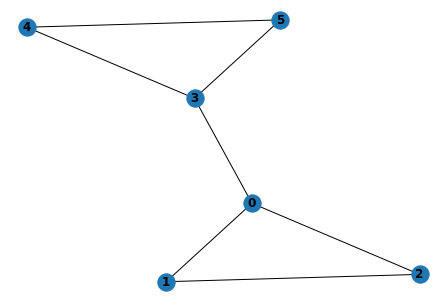

In [6]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [7]:
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.reshape(X, (-1, 1))

In [8]:
print(f'LOG >>> Shape of A: {A.shape}')
print(f'LOG >>> Shape of X: {X.shape}')
print(f'LOG >>> Adgacency Matrix A:\n{A}')
print(f'LOG >>> Node Features Matirx X:\n{X}')

LOG >>> Shape of A: (6, 6)
LOG >>> Shape of X: (6, 1)
LOG >>> Adgacency Matrix A:
[[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]
LOG >>> Node Features Matirx X:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [9]:
AX = np.matmul(A, X)
print(f'Dot product of A and X AX:\n{AX}')

Dot product of A and X AX:
[[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


In [10]:
# A를 2번 곱하면 두번 떨어진 Node들의 feature 합
AAX = np.matmul(A, AX)
print(f'Dot product of A and AX AAX:\n{AAX}')

Dot product of A and AX AAX:
[[12.]
 [ 7.]
 [ 8.]
 [21.]
 [16.]
 [17.]]


#### Self Loop가 포함된 그래프 

In [11]:
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i, i))
    
G_self_loops.add_edges_from(self_loops)    

In [12]:
print(f'LOG >>> Edges of G with self-loops:\n{G_self_loops.edges}')

LOG >>> Edges of G with self-loops:
[(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]


In [13]:
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print(f'LOG >>> Adgacency Matrix of added self-loops G A_hat:\n{A_hat}')

LOG >>> Adgacency Matrix of added self-loops G A_hat:
[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]


In [14]:
AX = np.matmul(A_hat, X)
print(f'LOG >>> AX:\n{AX}')

LOG >>> AX:
[[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


#### Graph의 Feature를 Normalize 해야함

$normalized features = D^-1AX$

Definition of Degree in Graph

Degree = Max(Vertex of degree)

In [15]:
Deg_Mat = G_self_loops.degree()
print(f'LOG >>> Degree Matrix of added self-loops G D:\n{Deg_Mat}')

LOG >>> Degree Matrix of added self-loops G D:
[(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]


In [16]:
D = np.diag([deg for (n, deg) in list(Deg_Mat)])
print(f'LOG >>> Degree Matrix of added self-loops G as numpy array D:\n{D}')

LOG >>> Degree Matrix of added self-loops G as numpy array D:
[[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]


In [20]:
A_hat

array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [22]:
D_inv = np.linalg.inv(D)
print(f'LOG >>> Inverse of D:\n{D_inv}')

LOG >>> Inverse of D:
[[0.2  0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25]]


$A^(1/2) = QD^(1/2)Q^T$ 

In [39]:
DAX = np.matmul(D_inv, AX)
print(f'LOG >>> DAX:\n{DAX}')

LOG >>> DAX:
[[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


$D(-1/2)AD(-1/2)$ 

In [30]:
D_half_norm = fractional_matrix_power(D, -0.5)

In [42]:
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print(f'LOG >>> DADX:\n{DADX}')

LOG >>> DADX:
[[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


### Add Weight 

In [63]:
SEED = 2
np.random.seed(SEED)
n_h = 4
n_y = 2
W0 = np.random.randn(X.shape[1], n_h) * 0.01
print(f'LOG >>> W0:\n{W0}')
W1 = np.random.randn(n_h, n_y) * 0.01
print(f'LOG >>> W1:\n{W1}')

def relu(x):
    return np.maximum(0, x)

def gcn(A, H, W):
    I = np.identity(A.shape[0])
    A_hat = A + I
    print(f'LOG >>> A_hat:\n{A_hat}')
    D = np.diag(np.sum(A_hat, axis=0))
    D_half_norm = fractional_matrix_power(D, -0.5)
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    print(f'LOG >>> eq:\n{eq}')
    return relu(eq)

H1 = gcn(A, X, W0)
H2 = gcn(A, H1, W1)
print(f'LOG >>> Features Representation from GCN output:\n{H2}')

LOG >>> W0:
[[-0.00416758 -0.00056267 -0.02136196  0.01640271]]
LOG >>> W1:
[[-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]
 [-0.01057952 -0.00909008]
 [ 0.00551454  0.02292208]]
LOG >>> A_hat:
[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
LOG >>> eq:
[[-0.00673491 -0.00090929 -0.03452147  0.02650719]
 [-0.00416758 -0.00056267 -0.02136196  0.01640271]
 [-0.00416758 -0.00056267 -0.02136196  0.01640271]
 [-0.01395337 -0.00188386 -0.07152147  0.05491752]
 [-0.01611196 -0.00217529 -0.08258588  0.06341329]
 [-0.01611196 -0.00217529 -0.08258588  0.06341329]]
LOG >>> A_hat:
[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
LOG >>> eq:
[[0.00016448 0.00068368]
 [0.0001025  0.00042606]
 [0.0001025  0.00042606]
 [0.00031415 0.00130582]
 [0.00032055 0.00133243]
 [0.00032055 0.00133243]]
LOG >>> Features Representation from GCN output:


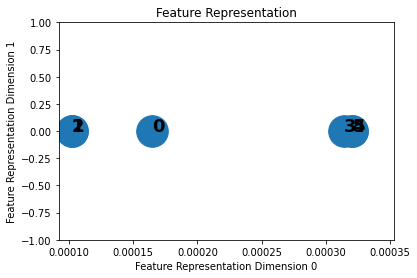

In [64]:
def plot_features(H2):
    x = H2[:, 0]
    y = H2[:, 1]
    
    size = 1000
    
    plt.scatter(x, y, size)
    plt.xlim([np.min(x) * 0.9, np.max(x) * 1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')
    
    for i, row in enumerate(H2):
        plt.annotate(str(i), (row[0], row[1]), fontsize=18, fontweight='bold')
        
    plt.show()
    
plot_features(H2)

# Normalize A

In [75]:
A_hat_result = []
temp = np.eye(A_hat.shape[0])
for i in range(30):
    temp = temp.dot(A_hat)
    A_hat_result.append(abs(np.linalg.eig(temp)[0][0]))

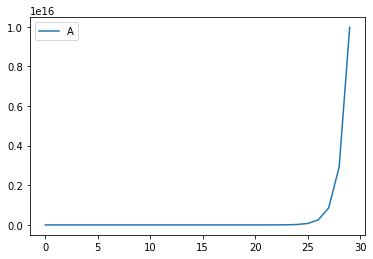

In [87]:
plt.plot(A_hat_result, label='A')
plt.legend()
plt.show()

In [88]:
np.matmul(D_inv, A_hat)

array([[0.2 , 0.2 , 0.2 , 0.2 , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.  , 0.  , 0.  ],
       [0.2 , 0.  , 0.  , 0.2 , 0.2 , 0.2 ],
       [0.  , 0.  , 0.  , 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 0.25, 0.25, 0.25]])

In [89]:
np.matmul(A_hat, D_inv)

array([[0.2 , 0.25, 0.25, 0.2 , 0.  , 0.  ],
       [0.2 , 0.25, 0.25, 0.  , 0.  , 0.  ],
       [0.2 , 0.25, 0.25, 0.  , 0.  , 0.  ],
       [0.2 , 0.  , 0.  , 0.2 , 0.25, 0.25],
       [0.  , 0.  , 0.  , 0.2 , 0.25, 0.25],
       [0.  , 0.  , 0.  , 0.2 , 0.25, 0.25]])

In [79]:
DAD_result = []
DAD = np.matmul(D_inv, A_hat).dot(D_inv)
temp = np.eye(A_hat.shape[0])
for i in range(30):
    temp = temp.dot(DAD)
    DAD_result.append(abs(np.linalg.eig(temp)[0][0]))

In [81]:
D2AD2_result = []
D2AD2 = D_half_norm.dot(A_hat).dot(D_half_norm)
temp = np.eye(A_hat.shape[0])
for i in range(30):
    temp = temp.dot(D2AD2)
    D2AD2_result.append(abs(np.linalg.eig(temp)[0][0]))

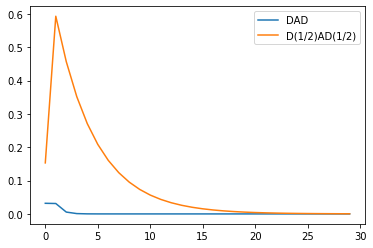

In [86]:
plt.plot(DAD_result, label='DAD')
plt.plot(D2AD2_result, label='D(1/2)AD(1/2)')
plt.legend()
plt.show()